 **I have renamed v1 as category, v2 as sms**

In [0]:
import os
import matplotlib.pyplot as plt
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [8]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']), encoding='latin-1')


In [10]:
df['sms'].apply(lambda x: len(x.split(' '))).sum()

86138

In [11]:
df.head

<bound method NDFrame.head of      category                                                sms
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
5        spam  FreeMsg Hey there darling it's been 3 week's n...
6         ham  Even my brother is not like to speak with me. ...
7         ham  As per your request 'Melle Melle (Oru Minnamin...
8        spam  WINNER!! As a valued network customer you have...
9        spam  Had your mobile 11 months or more? U R entitle...
10        ham  I'm gonna be home soon and i don't want to tal...
11       spam  SIX chances to win CASH! From 100 to 20,000 po...
12       spam  URGENT! You have won a 1 week FREE membership ...
13        ham  I've been searching for the right words to th

# Checking if data is balanced

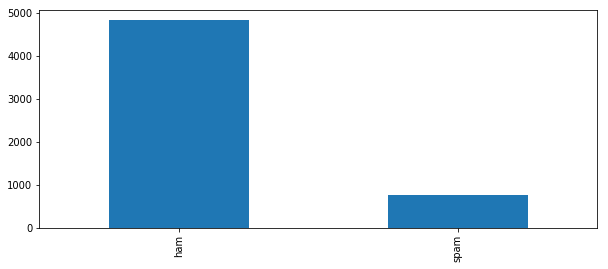

In [12]:
my_tags = ['Spam','Ham']
plt.figure(figsize=(10,4))
df.category.value_counts().plot(kind='bar');



# Cleaning the text

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:

STOPWORDS = set(stopwords.words('english'))

def clean_text(words):
    """
        words: a string
        
        return: modified initial string
    """
    
    
    words = ' '.join(word for word in words.split() if word not in STOPWORDS) # delete stopwors from text
    return words

In [15]:
df['sms'] = df['sms'].apply(clean_text)
df['sms'].apply(lambda x: len(x.split(' '))).sum()

60321

# Splitting the dataset into test, train

In [0]:
#SPLITTING THE DATA 70% TRAIN AND 30% TEST

X = df.sms
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


# Naive Bayes classifier 

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [18]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.9694610778443113
              precision    recall  f1-score   support

        Spam       0.97      1.00      0.98      1444
         Ham       1.00      0.77      0.87       226

    accuracy                           0.97      1670
   macro avg       0.98      0.89      0.93      1670
weighted avg       0.97      0.97      0.97      1670

CPU times: user 70.3 ms, sys: 197 µs, total: 70.5 ms
Wall time: 69.9 ms


# Linear support vector machine

In [19]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [20]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.974251497005988
              precision    recall  f1-score   support

        Spam       0.97      1.00      0.99      1444
         Ham       0.99      0.82      0.90       226

    accuracy                           0.97      1670
   macro avg       0.98      0.91      0.94      1670
weighted avg       0.97      0.97      0.97      1670

CPU times: user 68.4 ms, sys: 3.23 ms, total: 71.6 ms
Wall time: 69.8 ms
